In [ ]:
Q1.c

C:\Users\guany\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


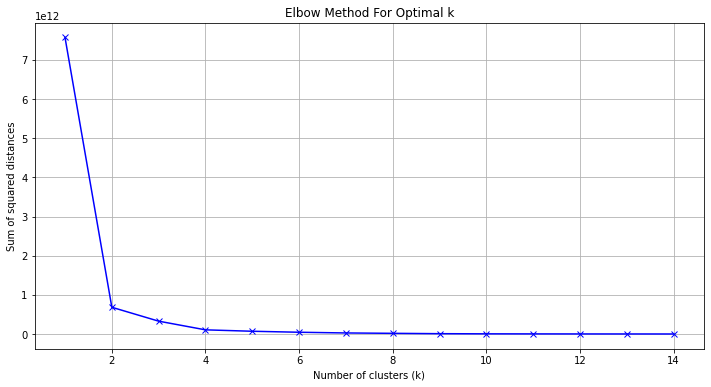

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = pd.read_excel("SIT307 4.2C database.xlsx")
numerical_data = data.select_dtypes(['float64', 'int64'])
numerical_data = numerical_data.fillna(numerical_data.mean())
numerical_data = numerical_data.drop(columns=['property_id_5'])

inertia = []
K = range(1, 15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(numerical_data)
    inertia.append(kmeanModel.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


In [3]:
Q2

NameError: name 'Q2' is not defined

In [8]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

data = pd.read_excel("SIT307 4.2C database.xlsx")
numerical_data = data.select_dtypes(['float64', 'int64'])
numerical_data = numerical_data.fillna(numerical_data.mean())
numerical_data = numerical_data.drop(columns=['property_id_5'])

scaled_data = StandardScaler().fit_transform(numerical_data)

agg_clustering = AgglomerativeClustering(n_clusters=5)# Assuming 5 clusters
labels_agg = agg_clustering.fit_predict(scaled_data)

silhouette_agg = silhouette_score(scaled_data, labels_agg)

print("Agglomerative Clustering silhouette score:", silhouette_agg)


Agglomerative Clustering silhouette score: 0.188191746811501


In [9]:
Q3

NameError: name 'Q3' is not defined

In [10]:
from sklearn.metrics import silhouette_score

silhouette_dbscan = silhouette_score(scaled_data, labels_dbscan) if n_clusters_dbscan > 1 else -1
silhouette_kmeans_3 = silhouette_score(scaled_data, labels_kmeans_3)
silhouette_kmeans_4 = silhouette_score(scaled_data, labels_kmeans_4)

best_method = None
best_score = -2  # Start with a value less than the minimum possible silhouette score.

if silhouette_dbscan > best_score:
    best_score = silhouette_dbscan
    best_method = "DBSCAN"

if silhouette_kmeans_3 > best_score:
    best_score = silhouette_kmeans_3
    best_method = "KMeans (k=3)"

if silhouette_kmeans_4 > best_score:
    best_score = silhouette_kmeans_4
    best_method = "KMeans (k=4)"

print(f"The best clustering method based on silhouette score is {best_method} with a score of {best_score:.4f}.")


The best clustering method based on silhouette score is KMeans (k=3) with a score of 0.2967.


In [ ]:
Q4

                             year_completed  clue_block  property_id_1  \
year_completed                 1.000000e+00   -0.375032      -0.617818   
clue_block                    -3.750316e-01    1.000000       0.469123   
property_id_1                 -6.178177e-01    0.469123       1.000000   
property_id_2                 -1.062766e-02    0.008273      -0.000153   
property_id_3                  5.511178e-16    0.039172       0.074025   
property_id_4                 -2.211113e-15    0.011841       0.000665   
floors_above                   3.346129e-01   -0.236508      -0.288569   
resi_dwellings                 3.535256e-01   -0.198367      -0.279739   
studio_dwe                     1.788796e-01   -0.065584      -0.148008   
one_bdrm_dwe                   4.013869e-01   -0.155423      -0.257286   
two_bdrm_dwe                   3.063816e-01   -0.139328      -0.201258   
three_bdrm_dwe                 2.466754e-01   -0.107826      -0.162573   
student_apartments             6.65899

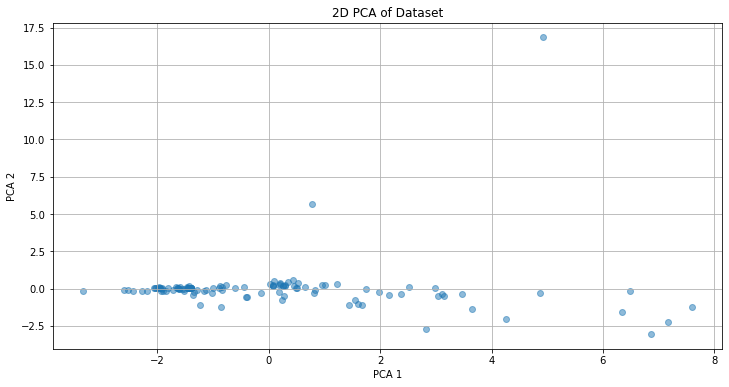

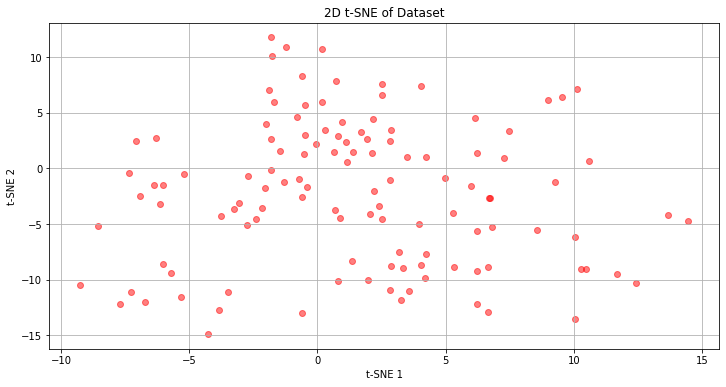

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

correlation_matrix = numerical_data.corr()
print(correlation_matrix)

pca = PCA(n_components=2)
principal_components_pca = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=principal_components_pca, columns=['PCA 1', 'PCA 2'])

tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
principal_components_tsne = tsne.fit_transform(scaled_data)
tsne_df = pd.DataFrame(data=principal_components_tsne, columns=['t-SNE 1', 't-SNE 2'])

plt.figure(figsize=(12, 6))
plt.scatter(pca_df['PCA 1'], pca_df['PCA 2'], alpha=0.5)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('2D PCA of Dataset')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(tsne_df['t-SNE 1'], tsne_df['t-SNE 2'], alpha=0.5, color='r')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('2D t-SNE of Dataset')
plt.grid(True)
plt.show()


In [ ]:
Q5

In [6]:
explained_variance = pca.explained_variance_ratio_
total_explained_variance = sum(explained_variance)

print(f"Explained variance by PCA 1: {explained_variance[0]*100:.2f}%")
print(f"Explained variance by PCA 2: {explained_variance[1]*100:.2f}%")
print(f"Total explained variance by the first two principal components: {total_explained_variance*100:.2f}%")


Explained variance by PCA 1: 16.02%
Explained variance by PCA 2: 9.85%
Total explained variance by the first two principal components: 25.87%
